In [8]:
def load_unit2index(file):
    unit2index = dict()
    with open(file, 'r') as fp:
        for line in fp:
            unit, index = line.strip().split('\t')
            unit2index[unit] = int(index)
    index2unit = {value:key for key,value in unit2index.items()}
    return unit2index,index2unit
def load_text(file):
    item2text = {}
    with open(file, 'r') as fp:
        fp.readline()
        for line in fp:
            item, text = line.strip().split('\t', 1)
            item2text[item] = text
    return item2text
item2index,index2item = load_unit2index("/home/ysh/project/KDA_LRD/data/Office_Products/Office.item2index")
user2index,index2user = load_unit2index("/home/ysh/project/KDA_LRD/data/Office_Products/Office.user2index")
item2text = load_text("/home/ysh/project/KDA_LRD/data/Office_Products/Office.text")

In [9]:
import pickle
with open('LRD_gt_rank_office.pkl', 'rb') as f:
    lrd_gt_rank = pickle.load(f)
with open('KDA_gt_rank_office.pkl', 'rb') as f:
    rcf_gt_rank = pickle.load(f)
print(lrd_gt_rank[:50])
print(rcf_gt_rank[:50])

[ 2  1  2  1 27  7 11  1 30 10  2 13 41  8 75 88 93  1 36  1 67  5 31  1
  4  1  8 68  1  3  8  5  1  2  1  1 17 48  2  2 15  1 62  1  2 15 45  1
 11 41]
[  2   1   2   3  36   3   7   1  13  19   2   7  16   1   4  62 100   1
  54   1  83   4  34   1   3   1  22  74   3   3   6   1   2   4   1   2
   9  68   2   1  41   5  49   1   1  15  33   3  16  21]


In [10]:
with open('LRD_result_office.pkl', 'rb') as f:
    data = pickle.load(f)
data

{'history_target': array([[  17,   27],
        [  19,   27],
        [  20,   27],
        ...,
        [   0, 2262],
        [   0, 2262],
        [   0, 2262]]),
 'predict': array([[0.01768673, 0.19852313, 0.41770977, ..., 0.02447723, 0.02957251,
         0.01795129],
        [0.0105215 , 0.26585507, 0.5406845 , ..., 0.01635182, 0.01977694,
         0.01088435],
        [0.01048231, 0.24563357, 0.49776697, ..., 0.01760257, 0.02289389,
         0.01129325],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]], dtype=float32)}

In [11]:
history_target = data["history_target"].reshape(-1,20, 2)
predict = data["predict"].reshape(-1,20, 13)

In [14]:
import torch
for uid in range(len(rcf_gt_rank)):  
# uid = 18
    history_target[uid][:,0], history_target[uid][0,1]
    count = 0
    history_item = []
    history_item_id = []
    for item in history_target[uid][:,0]:
        if item == 0:
            break
        if count+1 > 5:
            break
        count += 1
        history_item.append(item2text[index2item[item]])
        history_item_id.append(index2item[item])
    target_item = item2text[index2item[history_target[uid][0,1]]]
    rank = torch.tensor(predict[uid][:count]).topk(2,axis=1)
    if (rank.indices[:,0]==5).sum()>0 and lrd_gt_rank[uid] < 5 and 10 < rcf_gt_rank[uid]:
    # if lrd_gt_rank[uid] < 5 and 10 < rcf_gt_rank[uid]:
        for i in range(count):
            # print(history_item_id[i],history_item[i])
            print(uid,index2user[uid])
            print(history_item[i])
            print(rank.values[i])
            print(rank.indices[i].tolist())
        print(target_item)
        print("LRD rank_result:", lrd_gt_rank[uid])
        print("RCF rank_result:", rcf_gt_rank[uid])
        print("------------------------------------------------------")

162 A3N4VTNFPMTHEF
Epson WorkForce 600 Wireless All-in-One Printer (Black) (C11CA18201) Office Electronics
tensor([0.1007, 0.0952])
[0, 12]
162 A3N4VTNFPMTHEF
Avery NoteTabs, 3 x 1.5 Inches, Neon Blue and Magenta, 16 per pack (16299) Removable Labels
tensor([0.3134, 0.2354])
[2, 1]
162 A3N4VTNFPMTHEF
Avery NoteTabs, 3 x 3.5 Inches, Pastel Blue, 20 per pack (16330) Removable Labels Avery
tensor([0.3402, 0.2691])
[2, 1]
162 A3N4VTNFPMTHEF
Sharpie 1758054 Pen-Grip Fine Point Pen, Colored Ink, 3-Pack Porous-Point Pens Sharpie
tensor([0.0990, 0.0986])
[5, 12]
162 A3N4VTNFPMTHEF
Canon PIXMA MX870 Wireless Office All-in-One Printer (4206B002) Office Electronics Canon
tensor([0.1157, 0.1129])
[12, 5]
Smead Hanging Folder without Tab, Letter, 2-Inch Expansion, Assorted Colors, 25 per Box (64264) Hanging Folders & Interior Folders Smead
LRD rank_result: 4
RCF rank_result: 28
------------------------------------------------------
331 ALRCAGJOJ9583
Avery Removable Window and Wall Signage, InkJet, 

In [ ]:
import torch
topk = torch.tensor(data["predict"]).topk(10, dim=0)

In [ ]:
topk[0]

tensor([[0.1647, 0.9449, 0.8938, 0.5579, 0.9916, 0.1405, 0.0975, 0.1022, 0.1187,
         0.1319, 0.1071, 0.0982, 0.1459],
        [0.1643, 0.9449, 0.8784, 0.5424, 0.9821, 0.1375, 0.0965, 0.1018, 0.1115,
         0.1303, 0.1070, 0.0933, 0.1443],
        [0.1630, 0.9392, 0.8707, 0.5414, 0.9768, 0.1358, 0.0964, 0.1005, 0.1095,
         0.1259, 0.1069, 0.0931, 0.1421],
        [0.1622, 0.9387, 0.8644, 0.5215, 0.9758, 0.1353, 0.0961, 0.0997, 0.1082,
         0.1259, 0.1068, 0.0928, 0.1383],
        [0.1587, 0.9301, 0.8644, 0.5048, 0.9754, 0.1333, 0.0960, 0.0991, 0.1081,
         0.1257, 0.1066, 0.0921, 0.1380],
        [0.1585, 0.9301, 0.8594, 0.5004, 0.9754, 0.1327, 0.0959, 0.0986, 0.1081,
         0.1243, 0.1042, 0.0916, 0.1379],
        [0.1570, 0.9173, 0.8486, 0.4776, 0.9741, 0.1318, 0.0959, 0.0976, 0.1076,
         0.1239, 0.1041, 0.0915, 0.1379],
        [0.1568, 0.9131, 0.8486, 0.4591, 0.9733, 0.1316, 0.0957, 0.0976, 0.1076,
         0.1236, 0.1039, 0.0913, 0.1368],
        [0.1562,

In [ ]:
topk[1][:,0]


tensor([650, 648, 649, 651, 646, 652, 653, 654, 647, 645])

In [ ]:
def load_unit2index(file):
    unit2index = dict()
    with open(file, 'r') as fp:
        for line in fp:
            unit, index = line.strip().split('\t')
            unit2index[unit] = int(index)
    index2unit = {value:key for key,value in unit2index.items()}
    return unit2index,index2unit
def load_text(file):
    item2text = {}
    with open(file, 'r') as fp:
        fp.readline()
        for line in fp:
            item, text = line.strip().split('\t', 1)
            item2text[item] = text
    return item2text
item2index,index2item = load_unit2index("/home/ysh/project/KDA_LRD/data/Office/Office.item2index")
item2text = load_text("/home/ysh/project/KDA_LRD/data/Office/Office.text")

In [ ]:
# read df_relation_1
label = 8
with open(f"lable_{label}_item_pairs.txt","w") as outf:
    for index, row in df[df["label"]==label].iterrows():
        # print("history_item_id:",index2item[row["history_item_id"]])
        # print("target_item_id:",index2item[row["target_item_id"]])
        # print("label:",row["label"])
        outf.write("item1: "+item2text[index2item[row["history_item_id"]]]+"\t""item2: "+item2text[index2item[row["target_item_id"]]]+"\n")

In [ ]:
# data["history"] is a user history item matrix, [n_user,n_history_item], data["target"] is a target item matrix, [n_target_item,], data["predict"] is a predicted matrix contain the label of each history item to target item, [n_user,n_history_item]
# obatain a dataframe of user history item and target item, each row is a triple (history_item_id, target_item_id, label)
import pandas as pd
history_item = data["history"]
target_item = data["target"]
predict = data["predict"]
history_item_id = []
target_item_id = []
label = []
for i in range(len(history_item)):
    for j in range(len(history_item[i])):
        history_item_id.append(history_item[i][j])
        target_item_id.append(target_item[i])
        label.append(predict[i][j])
df = pd.DataFrame({'history_item_id':history_item_id,'target_item_id':target_item_id,'label':label})
df

,history_item_id,target_item_id,label
0,17,27,1
1,19,27,2
2,20,27,2
3,21,27,2
4,22,27,2
...,...,...,...
98095,0,2262,-1
98096,0,2262,-1
98097,0,2262,-1
98098,0,2262,-1


In [ ]:
# remove label is -1
df = df[df['label']!=-1]
df

,history_item_id,target_item_id,label
0,17,27,1
1,19,27,2
2,20,27,2
3,21,27,2
4,22,27,2
...,...,...,...
98076,2312,2414,1
98080,1308,2262,6
98081,1435,2262,2
98082,1176,2262,6


In [ ]:
# remove the same row
df = df.drop_duplicates()
df

,history_item_id,target_item_id,label
0,17,27,1
1,19,27,2
2,20,27,2
3,21,27,2
4,22,27,2
...,...,...,...
98075,2268,2414,10
98080,1308,2262,6
98081,1435,2262,2
98082,1176,2262,6


In [ ]:
# read df_lable_5 rows
label = 8
with open(f"lable_{label}_item_pairs.txt","w") as outf:
    for index, row in df[df["label"]==label].iterrows():
        # print("history_item_id:",index2item[row["history_item_id"]])
        # print("target_item_id:",index2item[row["target_item_id"]])
        # print("label:",row["label"])
        outf.write("item1: "+item2text[index2item[row["history_item_id"]]]+"\t""item2: "+item2text[index2item[row["target_item_id"]]]+"\n")

In [ ]:
for i in range(7,9):
    df_pair = pd.read_csv(f"lable_{i}_item_pairs.txt",sep="\t",header=None)
    print(f"relation {i}:")
    df_pair = df_pair.sample(5)
    for index, row in df_pair.iterrows():
        print(row[0],row[1])

relation 7:
item1: Fellowes Thermal Binding Machine, Helios 30 (5219301) Binding Machines Fellowes item2: Wilson Jones View-Tab Transparent Dividers, 8-Tab Set, Square Multicolor, 5 Pack (5 sets of 8-Tab Dividers) (W55567) Binder Index Dividers Wilson Jones
item1: Fellowes Powershred 59Cb Cross-Cut Shredder with Jam Blocker Technology Shredders Fellowes item2: Quartet 5001M EnduraGlide Chisel Tip Dry Erase Marker - 4 Pack, Assorted Colors Erasable Markers Quartet
item1: Quartet Cork Bulletin Board, 2 x 3 Feet, Oak Finish Frame (MWDB2436M) Bulletin Boards nan item2: Quartet Cork Bulletin Board, 11 x 17 Inches, Black Frame (79279) Bulletin Boards nan
item1: Swingline Customizable Fashion Stapler, 20 Sheets, Assorted Skins Designs (S7087880) Desktop Staplers Swingline item2: Quartet Dry-Erase Board, 11 x 17 Inches, Black Frame (21-580532Q-BK) Dry Erase Boards nan
item1: Epson WorkForce WF-2530 Wireless All-in-One Color Inkjet Printer, Copier, Scanner, ADF, Fax. Prints from Tablet/Smartpho

In [ ]:
df_kg = pd.read_csv('relation_df.csv')
df_kg

,head,relation,tail
0,170,1,451
1,170,1,1886
2,170,1,2159
3,170,1,45
4,170,1,1107
...,...,...,...
60701,2403,4,2468
60702,2395,4,2468
60703,2398,4,2468
60704,2399,4,2467


In [ ]:
# change the order of the columns, head tail relation
df_kg = df_kg[['head','tail','relation']]
df_kg

,head,tail,relation
0,170,451,1
1,170,1886,1
2,170,2159,1
3,170,45,1
4,170,1107,1
...,...,...,...
60701,2403,2468,4
60702,2395,2468,4
60703,2398,2468,4
60704,2399,2467,4


In [ ]:
# rename the columns of df to match the columns of df_kg
df = df.rename(columns={'history_item_id':'head','target_item_id':'tail','label':'relation'})
df

,head,tail,relation
0,17,27,1
1,19,27,2
2,20,27,2
3,21,27,2
4,22,27,2
...,...,...,...
98075,2268,2414,10
98080,1308,2262,6
98081,1435,2262,2
98082,1176,2262,6


In [ ]:
# get the same row of df and df_kg
df_merge = pd.merge(df, df_kg, how='inner', on=['head','tail'])
df_merge
# df_merge["relation"].value_counts()

,head,tail,relation_x,relation_y
0,110,120,2,1
1,110,120,2,2
2,111,120,1,1
3,118,120,2,1
4,119,120,2,1
...,...,...,...,...
2166,2413,2313,8,2
2167,2253,2407,1,2
2168,2150,2412,6,2
2169,1538,2405,5,1


In [ ]:
df_merge[df_merge["relation_x"]==df_merge["relation_y"]][df_merge["relation_x"]==2]

/home/ysh/miniconda3/envs/prompt/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,head,tail,relation_x,relation_y
1,110,120,2,2
5,6,180,2,2
19,351,592,2,2
57,830,1452,2,2
66,1514,1314,2,2
...,...,...,...,...
2081,397,1888,2,2
2083,777,1888,2,2
2103,659,2408,2,2
2117,347,2398,2,2


In [ ]:
pd.merge(df, df_kg, how='inner', on=['head','tail','relation'])

,head,tail,relation
0,110,120,2
1,111,120,1
2,6,180,2
3,430,448,1
4,351,592,2
...,...,...,...
540,69,483,2
541,1217,546,1
542,459,546,1
543,1341,2314,1


In [ ]:
ralation_count = df_kg["relation"].value_counts()
ralation_count

1    38071
2    18345
3     2351
4     1939
Name: relation, dtype: int64

In [ ]:
label_count = df["label"].value_counts()
label_count

6     7620
1     6010
9     4733
0     4050
10    3672
2     3662
7     3295
8     3210
5     2581
Name: label, dtype: int64

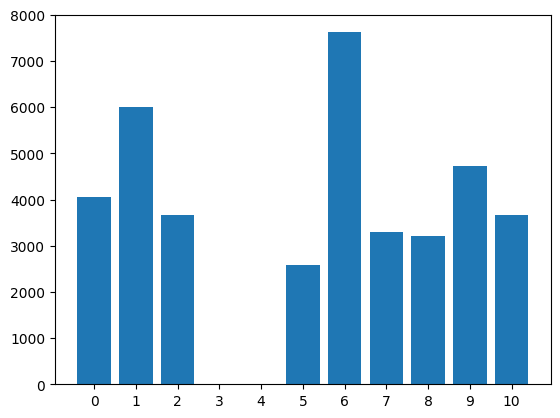

In [ ]:
# draw a bar figure of label_count
import matplotlib.pyplot as plt
x = list(label_count.index)+[3,4]
y = list(label_count.values)+[0,0]
# x,y
plt.bar(x,y)
# plt.bar(label_count.index,label_count)
plt.xticks(x)
# plt.bar(ralation_count.index,ralation_count)
plt.savefig(dpi=300, fname='label_count.png')